### grp

# Course: _Big Data Fundamentals via PySpark_:
1.  intro
2.  rdd
3.  sql & df
4.  ml

https://spark.apache.org/docs/latest/api/python/index.html

## _1. Introduction to Big Data analysis with Spark_:
-  3 Vs => Volumne, Variety, Velocity
-  SparkContext => entry point to connect to Spark Cluster Unstructured API
-  PySpark => Spark's Python API
-  functions:
    - ```parallelize(...)```
    - ```textFile(...)```
    -  ```map(...)``` => takes a function and a list and returns a new list which contains items returned by that function for each item
    - ```filter(...)```

#### SparkContext

In [1]:
print("The version of SparkContext in the PySpark shell is", sc.version)

The version of SparkContext in the PySpark shell is 2.4.3


In [2]:
print("The version of SparkSession in the PySpark shell is", spark.version)

The version of SparkSession in the PySpark shell is 2.4.3


#### python verison & executable

In [3]:
print("The Python version of Spark Context in the PySpark shell is", sc.pythonVer)

The Python version of Spark Context in the PySpark shell is 3.6


In [4]:
print("The Python executable (path) of Spark Context in the PySpark shell is", sc.pythonExec)

The Python executable (path) of Spark Context in the PySpark shell is python3


#### master node url/threads

In [5]:
print("The master of Spark Context in the PySpark shell is", sc.master, "=> 8 slots")

The master of Spark Context in the PySpark shell is local[8] => 8 slots


#### parallelize data

In [6]:
numb = range(1, 100)
spark_data = sc.parallelize(numb)

#### read text file

In [7]:
PATH = "course_data/spark_fundamentals/sample.txt"
lines = sc.textFile(PATH)
type(lines)

pyspark.rdd.RDD

#### lambda vs def

In [8]:
def cube(x):
    return x ** 3

g = lambda x: x ** 3 # no return statement for lambda

print(g(10))
print(cube(10))

1000
1000


#### map & filter

In [9]:
items = [1, 2, 3, 4]
print(list(map(lambda x: x + 2, items)))
print(list(filter(lambda x: (x%2 != 0), items)))

[3, 4, 5, 6]
[1, 3]


In [10]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]

print("Input list is", my_list)
squared_list_lambda = list(map(lambda x: x**2, my_list))
print("The squared numbers are", squared_list_lambda)

print("="*10)

print("Input list is:", my_list2)
filtered_list = list(filter(lambda x: (x%10 == 0), my_list2))
print("Numbers divisible by 10 are:", filtered_list)

Input list is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The squared numbers are [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Input list is: [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
Numbers divisible by 10 are: [10, 40, 60, 80]


## _2. Programming in PySpark RDDs_:
-  Resilient Distributed Datasets:
    -  Resilient => ability to withstand failures and are **immutabe** objects
    -  Distributed => spanning across multiple machines
    -  Datasets => collection of partitioned data (arrays, tables, tuples, etc.)
-  Partition => logical division of a large distributed dataset
-  Transformations => create new RDDs ... examples include:
    -  ```map(...)``` => takes in a function and applies it to each element in the RDD
    -  ```filter(...)```
    -  ```flatMap(...)``` => returns multiple values for each element in the original RDD
    -  ```union(...)```
-  Actions => perform computation on RDDs ... examples include:
    -  ```collect()```
    -  ```take()```
    -  ```first()```
    -  ```count()```
    -  ```reduce()``` => aggregates the elements of a regular RDD
    -  ```saveAsTextFile()```
-  Pair RDD Transformations => key is the identifier and value is the data ... examples include:
    -  ```reduceByKey(...)``` => combines values with same key
    -  ```sortByKey(...)```
    -  ```groupByKey(...)``` => groups all values with the same key in the pair RDD
    -  ```join(...)``` => joins two pair RDDs on common key
-  Pair RDD Actions => key is the identifier and value is the data ... examples include:
    -  ```countByKey()``` => counts number of elements for each key
    -  ```collectAsMap()``` => return key-value RDD pairs as dictionary

#### RDD via parallelized collections

In [11]:
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


#### RDD via external source

In [12]:
print("The file_path is", PATH)
fileRDD = sc.textFile(PATH)
print("The file type of fileRDD is", type(RDD))

The file_path is course_data/spark_fundamentals/sample.txt
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


#### specify partitions

In [13]:
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())
fileRDD_part = sc.textFile(PATH, minPartitions=3)
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 3


#### map and collect

In [14]:
numbRDD = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
cubedRDD = numbRDD.map(lambda x: x ** 3)
numbers_all = cubedRDD.collect()
for numb in numbers_all: print(numb)

1
8
27
64
125
216
343
512
729
1000


#### filter and count

In [15]:
fileRDD_filter = fileRDD.filter(lambda line: 'Spark' in line)
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())
for line in fileRDD_filter.take(1): print(line)

The total number of lines with the keyword Spark is 1
Apache Spark™ is a unified analytics engine for large-scale data processing.


#### reducebykey and collect

In [16]:
Rdd = sc.parallelize([(1,2), (3,4), (3,6), (4,5)])
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)
for num in Rdd_Reduced.collect(): 
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 1 has 2 Counts
Key 3 has 10 Counts
Key 4 has 5 Counts


In [17]:
print(Rdd_Reduced.collect())
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False) # desc order
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

[(1, 2), (3, 10), (4, 5)]
Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


#### countbykey

In [18]:
Rdd = sc.parallelize([(1, 2), (3, 4), (3, 6), (4, 5)])
total = Rdd.countByKey()
print("The type of total is", type(total))
for k, v in total.items(): 
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


#### rdd word count

In [19]:
PATH = 'course_data/spark_fundamentals/Complete_Shakespeare.txt'
baseRDD = sc.textFile(PATH)
splitRDD = baseRDD.flatMap(lambda x: x.split())
print("Total number of words in splitRDD:", splitRDD.count())
print(splitRDD.take(3))

Total number of words in splitRDD: 128576
['The', 'Project', 'Gutenberg']


In [20]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)
print(splitRDD_no_stop_words.take(3))
print(resultRDD.take(3))

[('The', 1), ('Project', 1), ('Gutenberg', 1)]
[('The', 609), ('Project', 9), ('EBook', 1)]


In [21]:
for word in resultRDD.take(10): print(word)
print("="*10)
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)
for word in resultRDD_swap_sort.take(10):
    print("{} has {} counts". format(word[1], word[0]))

('The', 609)
('Project', 9)
('EBook', 1)
('of', 2060)
('Shakespeare', 12)
('is', 1119)
('use', 38)
('anyone', 1)
('anywhere', 1)
('at', 326)
the has 3109 counts
and has 2403 counts
to has 2295 counts
of has 2060 counts
a has 1643 counts
in has 1434 counts
that has 1221 counts
is has 1119 counts
not has 1030 counts
with has 923 counts


## _3. PySpark SQL & DataFrames_:
-  SparkSession => entry point to connect to Spark Cluster Structured API
-  Transformations => create new DFs ... examples include:
    -  ```select(...)```
    -  ```filter(...)```
    -  ```groupBy(...)```
    -  ```orderBy(...)```
    -  ```dropDuplicates(...)```
    -  ```withColumnRenamed(...)```
-  Actions => perform computation on DFs ... examples include:
    -  ```show()```
    -  ```count()```
    -  ```describe()```
-  Spark SQL => perform SQL queries via ```spark.sql("""...""")```
-  PySpark Visualizations => data visualization ... options include:
    -  ```PySpark_dist_explore```
    -  ```toPandas()```
    -  ```HandySpark```

#### rdd to df

In [22]:
sample_list = [('Mona',20), ('Jennifer',34),('John',20), ('Jim',26)]
rdd = sc.parallelize(sample_list)
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


#### csv to df

In [23]:
PATH = "course_data/spark_fundamentals/people.csv"
people_df = spark.read.csv(PATH, header=True, inferSchema=True)
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


#### df eda

In [24]:
people_df.show(10)
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))
print("There are {} columns in the people_df DataFrame and their names are {}"\
      .format(len(people_df.columns), people_df.columns))

+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


#### df selecting and cleaning

In [25]:
people_df_sub = people_df.select('name', 'sex', 'date of birth')
people_df_sub.show(10)
people_df_sub_nodup = people_df_sub.dropDuplicates()
print("There were {} rows before removing duplicates, and {} rows after removing duplicates"\
      .format(people_df_sub.count(), people_df_sub_nodup.count()))

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


#### df filtering

In [26]:
people_df_female = people_df.filter(people_df.sex == "female")
people_df_male = people_df.filter(people_df.sex == "male")
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame"\
      .format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


#### spark sql operations

In [27]:
people_df.createOrReplaceTempView("people")
QUERY = '''SELECT name FROM people'''
people_df_names = spark.sql(QUERY)
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [28]:
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames"\
      .format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


#### visualization via pandas

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

print("The column names of names_df are", names_df.columns)
df_pandas = names_df.toPandas()
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

The column names of names_df are ['Name', 'Age']


<Figure size 640x480 with 1 Axes>

#### summary stats

In [30]:
PATH = "course_data/spark_fundamentals/Fifa2018_dataset.csv"
fifa_df = spark.read.csv(PATH, header=True, inferSchema=True)
fifa_df.printSchema()
for i in fifa_df.take(1): print(i)
print("="*10)
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [31]:
fifa_df.createOrReplaceTempView('fifa_df_table')
QUERY = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''
fifa_df_germany_age = spark.sql(QUERY)
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



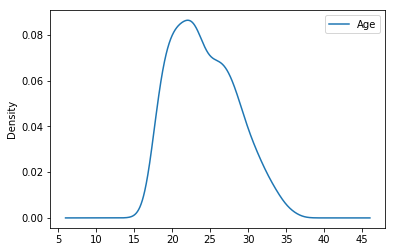

In [32]:
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

## _4. Machine Learning with PySpark MLlib_:
-  3 Cs of ML => Collaborative Filtering, Classification, and Clustering
-  ```pyspark.ml``` => DF API
-  ```pyspark.mllib``` => RDD API
-  Types of Vectors:
    -  Dense Vector => store all entries in array of floats
    -  Sparse Vector => store only non-zero values and indices
-  Collaborative Filtering:
    -  recommendation system to find common interests among users and items
    -  ALS => algorithm performing collaborative filtering
-  Classification:
    -  supervised ML via binary classifier or multi-class classifier
-  Clustering:
    -  unsupervised ML to organize collections of data in groups

#### mllib algs

In [33]:
from pyspark.mllib.recommendation import ALS, Rating
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LabeledPoint
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.clustering import KMeans

#### als (movie ratings) model

In [34]:
PATH = "course_data/spark_fundamentals/ratings.csv"
data = sc.textFile(PATH)
ratings = data.map(lambda l: l.split(','))
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

print(data.take(3))
print(ratings.take(3))

['1,31,2.5,1260759144', '1,1029,3.0,1260759179', '1,1061,3.0,1260759182']
[['1', '31', '2.5', '1260759144'], ['1', '1029', '3.0', '1260759179'], ['1', '1061', '3.0', '1260759182']]


In [35]:
model = ALS.train(training_data, rank=10, iterations=10)
test_data_no_rating = test_data.map(lambda p: (p[0], p[1])) # drop ratings column
predictions = model.predictAll(test_data_no_rating)
predictions.take(3)

[Rating(user=529, product=3456, rating=3.5095222368160943),
 Rating(user=468, product=6400, rating=1.119700768293387),
 Rating(user=299, product=3272, rating=2.4352704872321143)]

In [36]:
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))
rates_and_preds = rates.join(preds) # join ratings w/ preds
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean() # mse metric
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

Mean Squared Error of the model for the test data = 1.35


#### logistic regression (spam/ham) model

In [37]:
SPAM = "course_data/spark_fundamentals/spam.txt"
HAM = "course_data/spark_fundamentals/ham.txt"
spam_rdd = sc.textFile(SPAM)
non_spam_rdd = sc.textFile(HAM)
spam_words = spam_rdd.map(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.map(lambda email: email.split(' '))
print(spam_rdd.first())
print(non_spam_rdd.first())
print("="*10)
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

You have 1 new message. Please call 08712400200.
Rofl. Its true to its name
The first element in spam_words is ['You', 'have', '1', 'new', 'message.', 'Please', 'call', '08712400200.']
The first element in non_spam_words is ['Rofl.', 'Its', 'true', 'to', 'its', 'name']


In [38]:
tf = HashingTF(numFeatures=200)
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features)) # label 1 for spam
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features)) # label 0 for non-spam
samples = spam_samples.union(non_spam_samples)
print(spam_samples.take(3))
print("="*10)
print(non_spam_samples.take(3))

[LabeledPoint(1.0, (200,[22,59,82,95,100,106,125],[2.0,1.0,1.0,1.0,1.0,1.0,1.0])), LabeledPoint(1.0, (200,[22,26,29,33,41,44,60,69,70,73,86,99,103,106,107,126,129,159,165,168,182],[2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])), LabeledPoint(1.0, (200,[0,21,27,31,59,65,70,83,91,92,94,99,112,136,140,159,165,196,199],[2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0]))]
[LabeledPoint(0.0, (200,[8,16,28,63,70,165],[1.0,1.0,1.0,1.0,1.0,1.0])), LabeledPoint(0.0, (200,[0,2,3,14,16,27,37,40,51,52,60,83,96,101,110,121,136,155,163,165,167,173,175,178],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])), LabeledPoint(0.0, (200,[27,40,49,52,63,80,134,136,140,175],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]))]


In [39]:
train_samples,test_samples = samples.randomSplit([0.8, 0.2])
model = LogisticRegressionWithLBFGS.train(train_samples)
predictions = model.predict(test_samples.map(lambda x: x.features))
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions) # combine org labels w/ pred labels
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))

Model accuracy : 0.86


#### k-means () model:
-  https://bl.ocks.org/rpgove/0060ff3b656618e9136b

In [40]:
PATH = "course_data/spark_fundamentals/5000_points.txt"
clusterRDD = sc.textFile(PATH)
rdd_split = clusterRDD.map(lambda x: x.split("\t"))
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])
print(clusterRDD.first())
print(rdd_split_int.take(3))
print("="*10)
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

664159	550946
[[664159, 550946], [665845, 557965], [597173, 575538]]
There are 5000 rows in the rdd_split_int dataset


In [41]:
from math import sqrt
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [42]:
for clst in range(13, 17): # elbow method
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

model = KMeans.train(rdd_split_int, k=15, seed=1)
cluster_centers = model.clusterCenters # cluster centers
print("="*10)
print(cluster_centers)

The cluster 13 has Within Set Sum of Squared Error 249164132.49410182
The cluster 14 has Within Set Sum of Squared Error 209371154.24941802
The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
The cluster 16 has Within Set Sum of Squared Error 202384225.6640126
[array([670929.06818182, 862765.73295455]), array([852058.45259939, 157685.52293578]), array([858947.9713467 , 546259.65902579]), array([398555.94857143, 404855.06857143]), array([507818.31339031, 175610.41595442]), array([801616.78164557, 321123.34177215]), array([606574.95622896, 574455.16835017]), array([320602.55, 161521.85]), array([337565.11890244, 562157.17682927]), array([167856.14071856, 347812.71556886]), array([244654.8856305 , 847642.04105572]), array([617601.91071429, 399504.21428571]), array([139682.37572254, 558123.40462428]), array([823421.2507837 , 731145.27272727]), array([417799.69426752, 787001.99363057])]


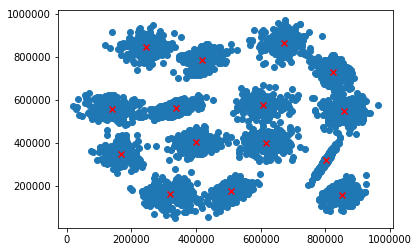

In [43]:
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()

### grp